In [5]:
# Importing the required libraries

# Importing library for data manipulation and analysis
import pandas as pd

# Library for statistical data visualization
import seaborn as sns

# Library for creating visualizations
import matplotlib.pyplot as plt

# Importing the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

 # Library for evaluating model accuracy
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix

In [11]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\Devyansh\Desktop\Core Subjects\ML\datasets\Fake_News_Detection_Dataset.csv")
df.head(10)
df.info
df.describe

<bound method NDFrame.describe of         ID  Word_Count  Number_of_Sentence  Unique_Words  Average_Word_Length  \
0     1606          10                   4            24             6.176750   
1     3718          10                   8            25             5.826770   
2     2634          10                   7            18             4.619040   
3     5560          10                   6            18             4.961424   
4     7494          10                   4            21             4.114324   
...    ...         ...                 ...           ...                  ...   
4495  1179          41                   7            12             6.963924   
4496  9445         100                   5            15             3.136755   
4497  4149         100                   8            18             3.376823   
4498  9877          85                  14            42             5.331393   
4499  6709          57                   6             7             4.3127

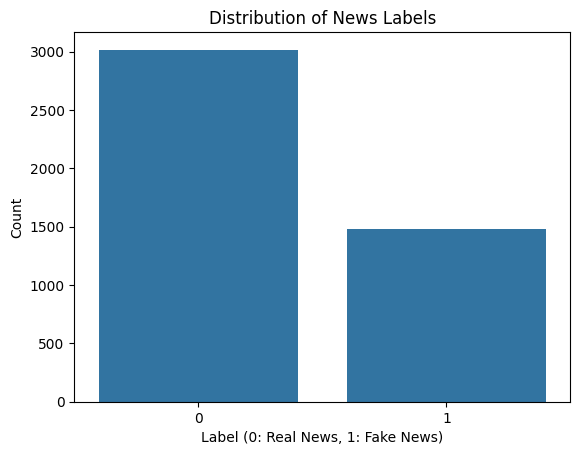

In [16]:
# Plotting the distribution of labels
ax = sns.countplot(x='Label', data=df)

# Adding labels and title
plt.xlabel('Label (0: Real News, 1: Fake News)')
plt.ylabel('Count')
plt.title('Distribution of News Labels')


plt.show()

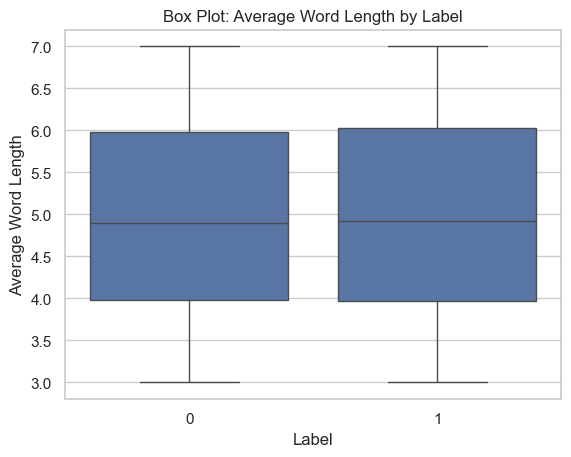

In [17]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot
sns.boxplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Box Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

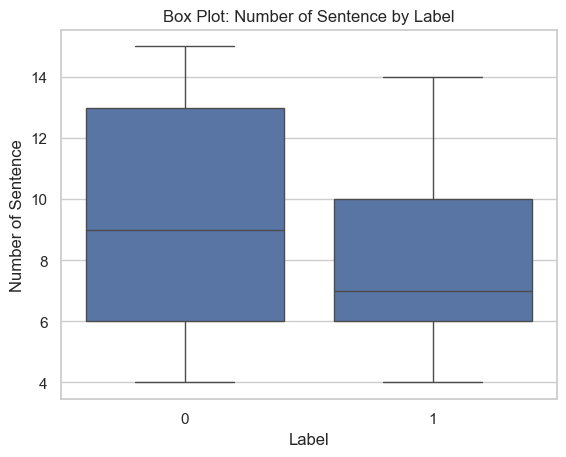

In [18]:
sns.boxplot(x="Label", y="Number_of_Sentence", data=df)
plt.title("Box Plot: Number of Sentence by Label")
plt.xlabel("Label")
plt.ylabel("Number of Sentence")
plt.show()

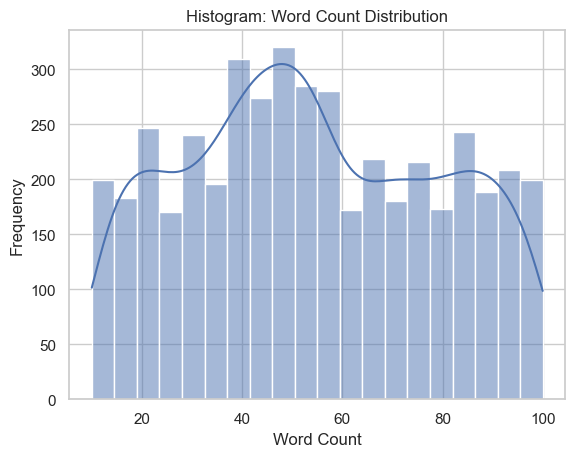

In [19]:
# Create a histogram
sns.histplot(data=df, x="Word_Count", bins=20, kde=True)
plt.title("Histogram: Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

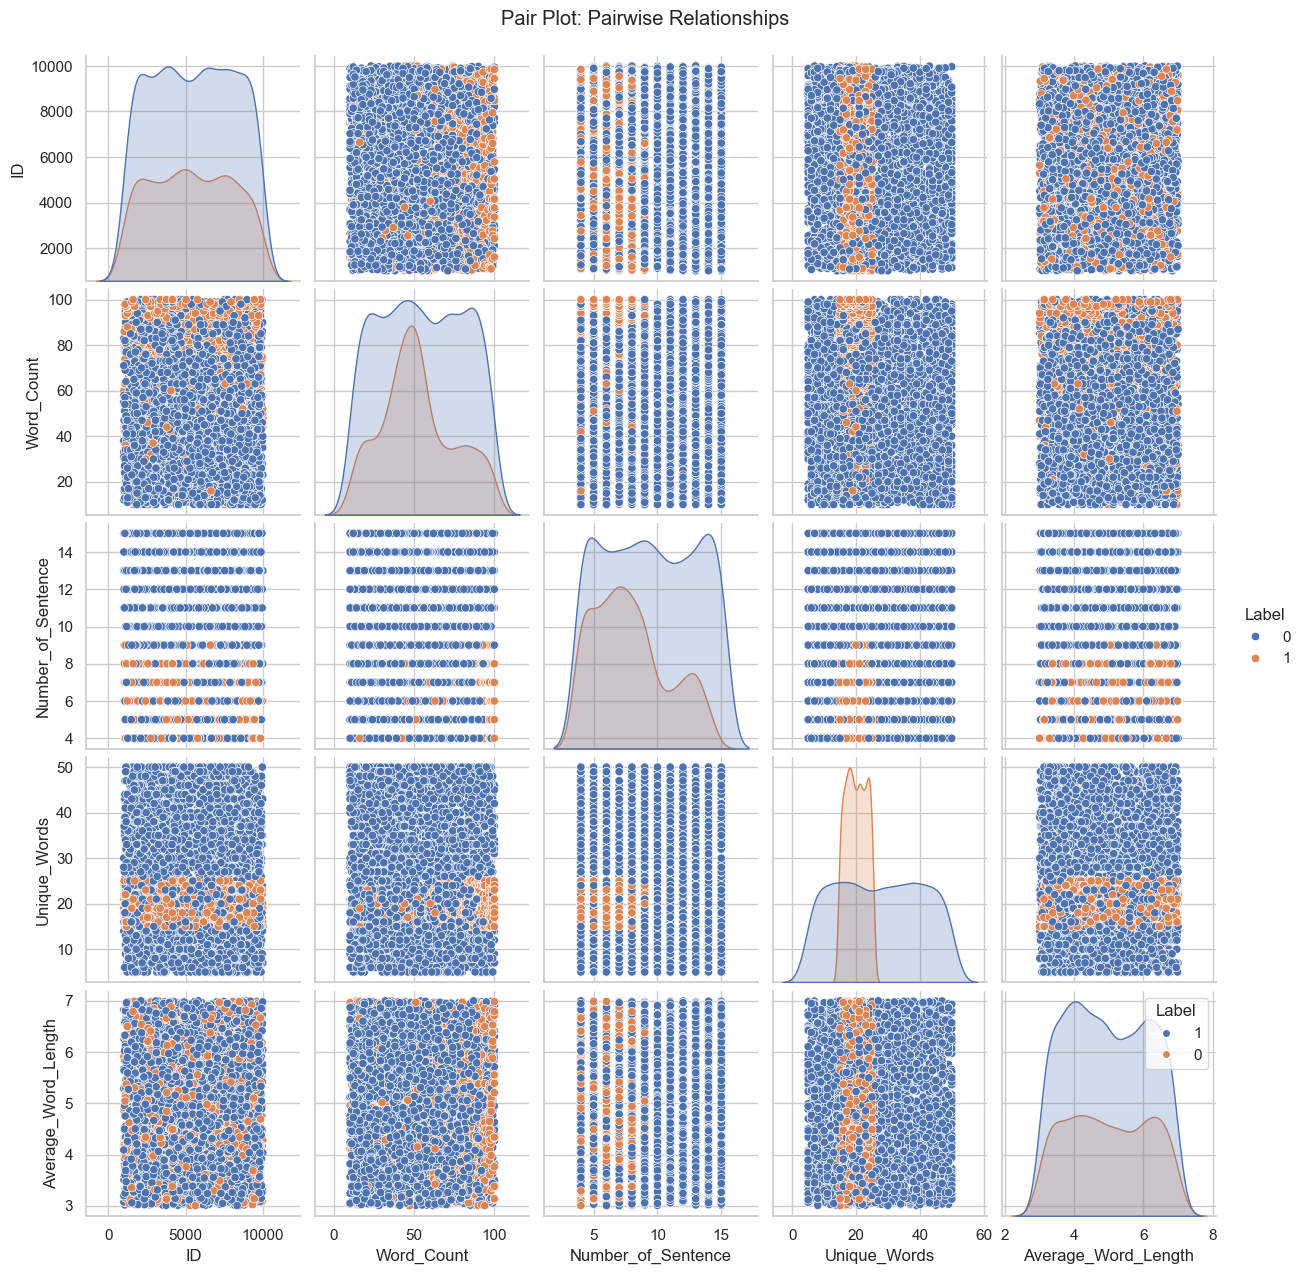

In [82]:
sns.pairplot(df, hue="Label")
plt.suptitle("Pair Plot: Pairwise Relationships", y=1.02)
unique_labels = df["Label"].unique()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], label=unique_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=legend_elements, title="Label", loc="upper right")


plt.show()

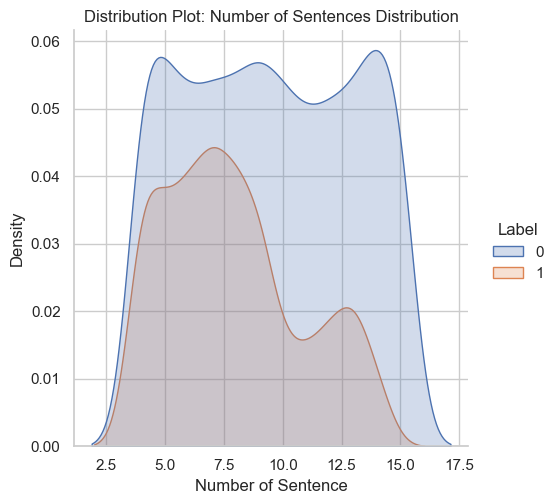

In [21]:
sns.displot(df, x="Number_of_Sentence", hue="Label", kind="kde", fill=True)
plt.title("Distribution Plot: Number of Sentences Distribution")
plt.xlabel("Number of Sentence")
plt.ylabel("Density")
plt.show()

In [71]:
# Separate features (X) and target variable (y)
X = df.drop(['Label',"ID"], axis=1)
y = df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [67]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [68]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [74]:
# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators =30,max_depth =20,random_state=42,n_jobs=-1,min_samples_leaf=10)
rf_model.fit(X_train, y_train)
# Make predictions on the test data
y_test_pred = rf_model.predict(X_test)
# Make predictions on the train data using the trained model
y_train_pred = rf_model.predict(X_train)


In [75]:
# Calculate F1 score
from sklearn.metrics import f1_score,accuracy_score
accuracy_score = accuracy_score(y_test, y_test_pred)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.8977777777777778


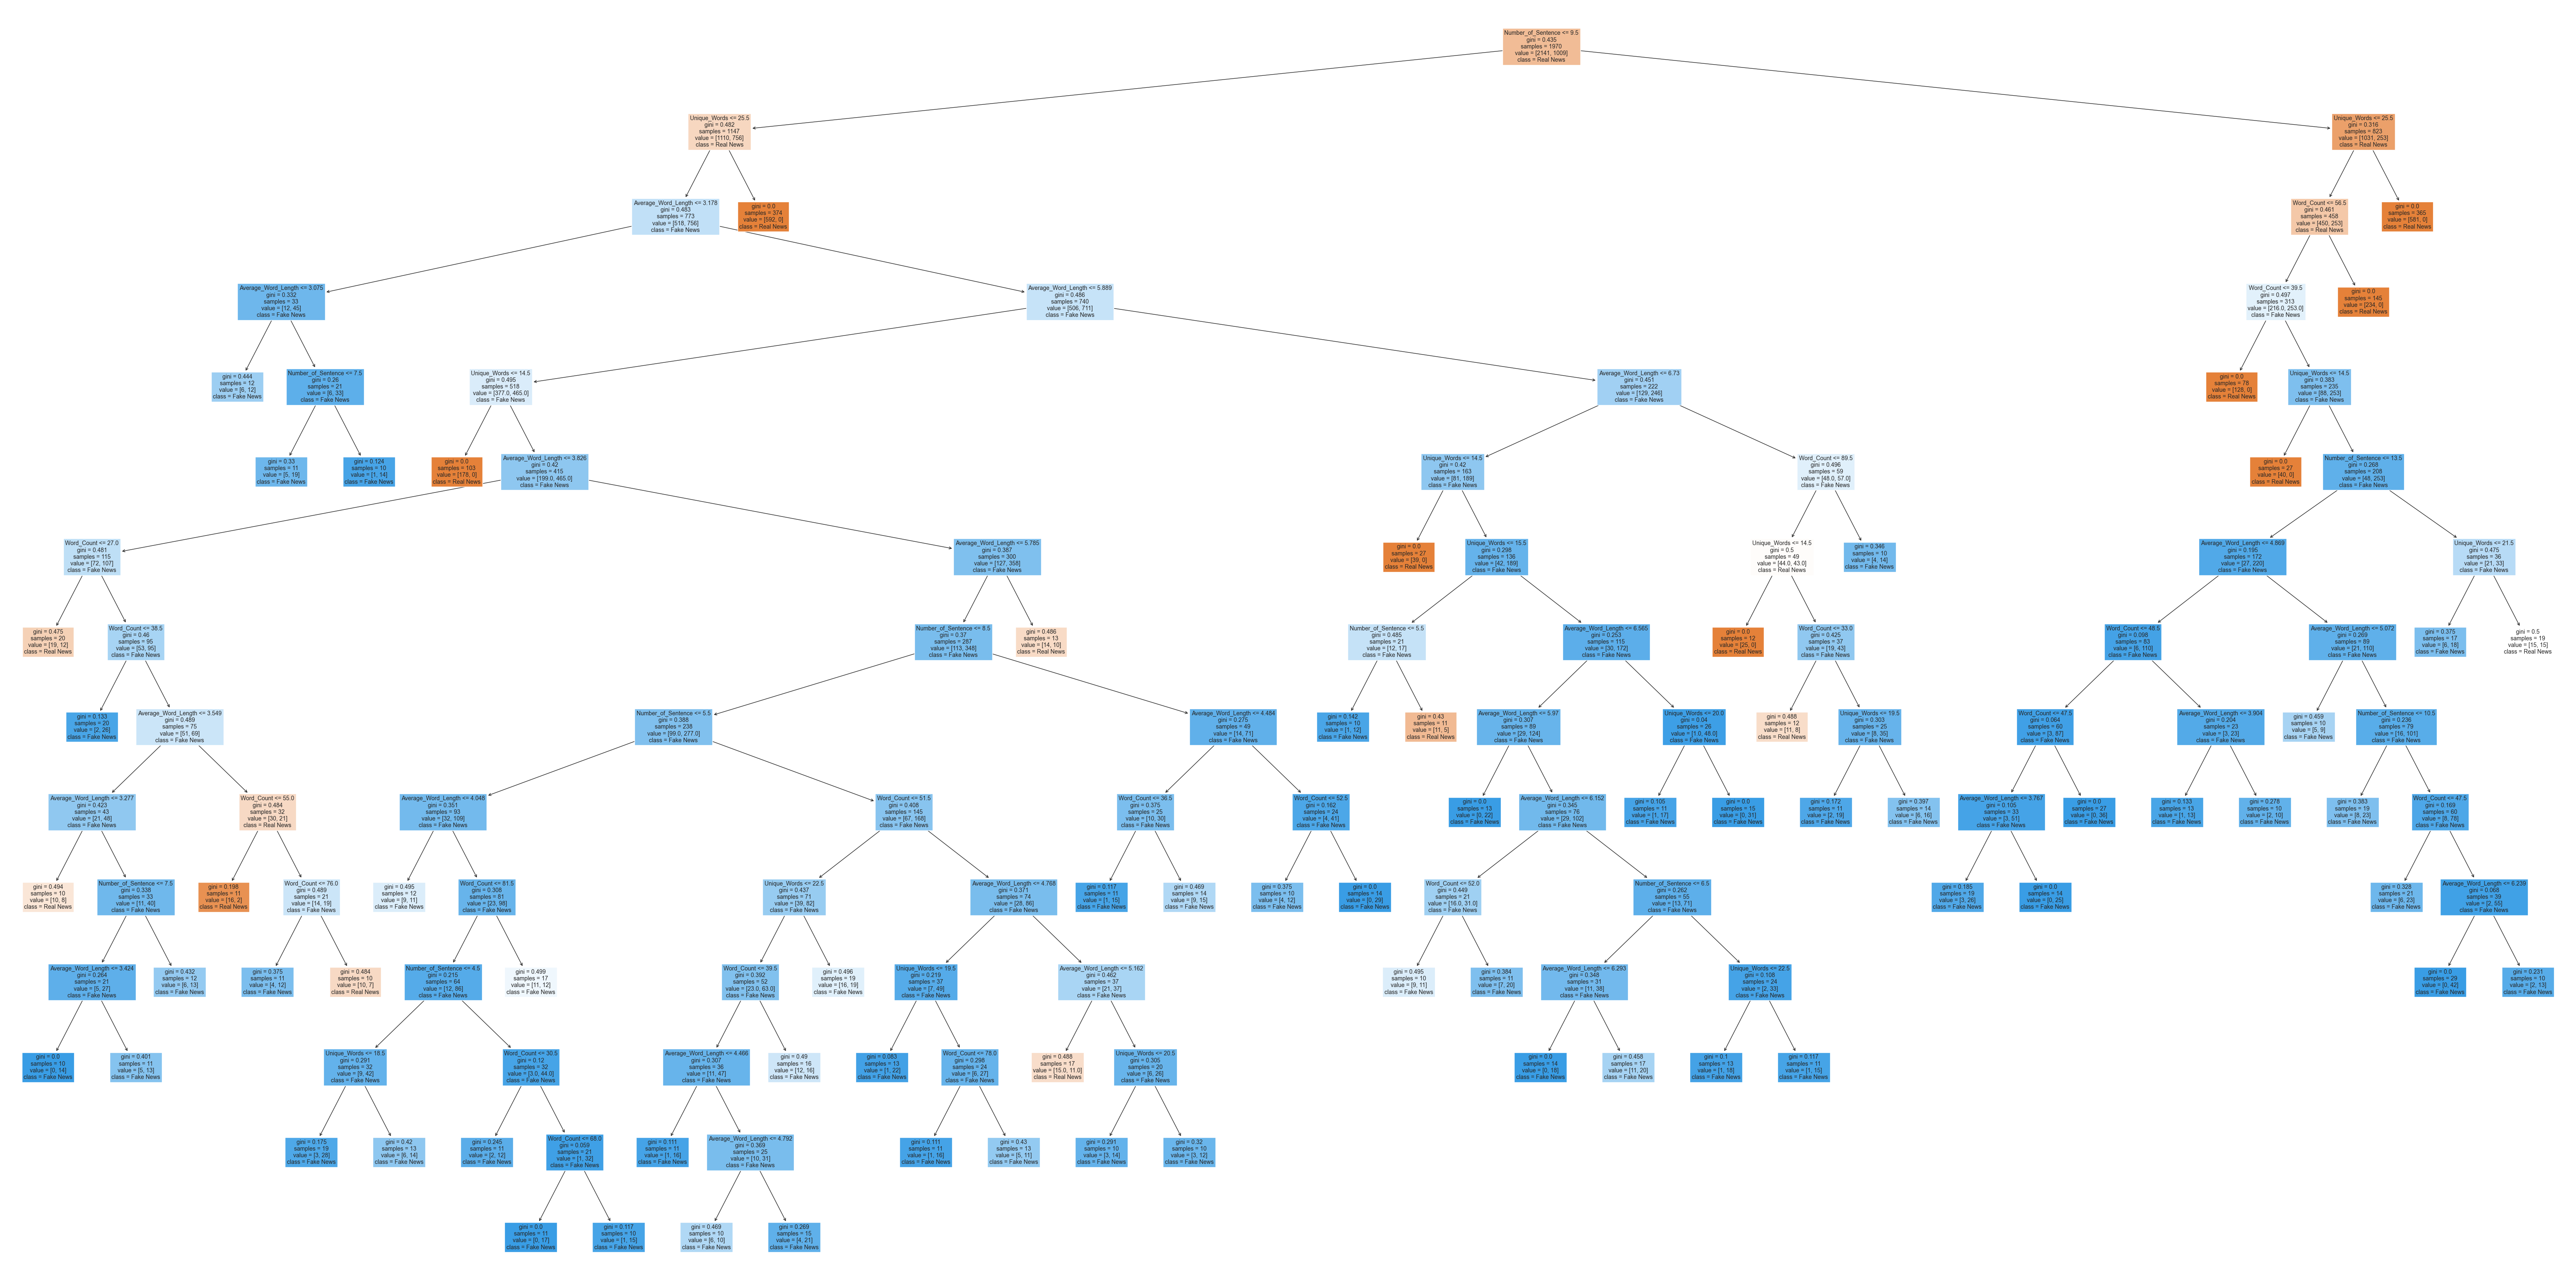

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[6], feature_names = X.columns,class_names=['Real News', "Fake News"],filled=True);

In [78]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
2         Unique_Words  0.691427
0           Word_Count  0.151273
1   Number_of_Sentence  0.111233
3  Average_Word_Length  0.046067

<Axes: >

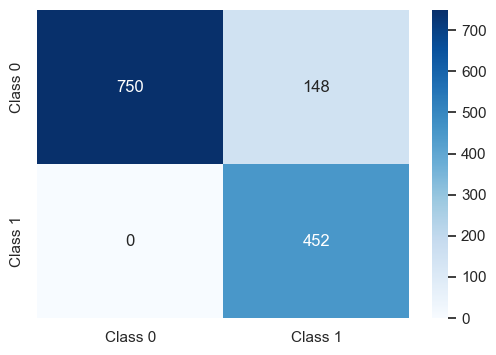

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,  random_state = 43)
gnb =GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print(Y_pred)

[0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 

Accuracy :  0.8366666666666667


<Axes: >

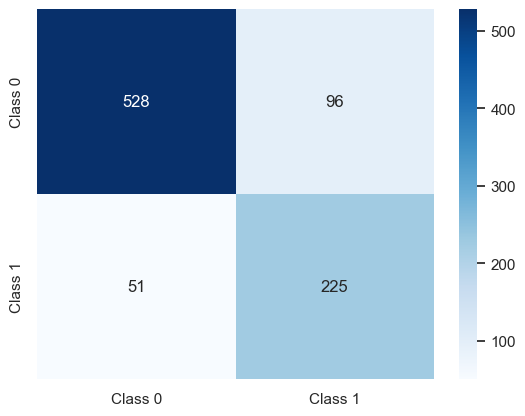

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 43)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [38]:
logreg.score(X_test,Y_test)

0.6588888888888889

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       603
           1       0.47      0.26      0.34       297

    accuracy                           0.66       900
   macro avg       0.59      0.56      0.55       900
weighted avg       0.63      0.66      0.63       900



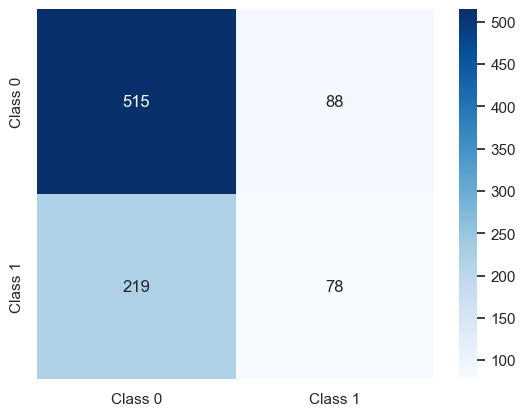

In [40]:

predictions = logreg.predict(X_test)
cm = confusion_matrix(Y_test,predictions)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
print(classification_report(Y_test,predictions))